In [1]:
import pandas as pd
import os
!git clone https://github.com/Benjaxmen/pm-prediction
!cd pm-prediction/

^C


In [2]:
import pandas as pd
import os
df = pd.read_csv("consolidado.csv")
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'consolidado.csv'

Cloning into 'pm-prediction'...
error: RPC failed; curl 92 HTTP/2 stream 5 was not closed cleanly: CANCEL (err 8)
error: 5798 bytes of body are still expected
fetch-pack: unexpected disconnect while reading sideband packet
fatal: early EOF
fatal: fetch-pack: invalid index-pack output


In [ ]:
nan_count = df.isna().sum()
print(nan_count)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of NaN for each column
nan_count = df.isna().sum()

# Set seaborn style (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
nan_count.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [ ]:
# Calcular la cantidad de NaN y no NaN por cada columna
nan_count = df.isna().sum()
non_nan_count = df.count(numeric_only=True)

# Calcular la proporción de NaN versus no NaN
nan_proportion = nan_count / (nan_count + non_nan_count)

# Configurar el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie([nan_proportion.sum()/12, 1 - nan_proportion.sum()/12], labels=['NaN', 'Non-NaN'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of NaN Values vs Non-NaN Values')

# Mostrar el gráfico
plt.show()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151917 entries, 0 to 151916
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA (YYMMDD)  151917 non-null  object 
 1   mp10            134143 non-null  float64
 2   station         151917 non-null  object 
 3   mp2.5           100558 non-null  float64
 4   dirviento       118690 non-null  float64
 5   tamb            110480 non-null  float64
 6   so2             95250 non-null   float64
 7   velviento       118676 non-null  float64
 8   hrel            106634 non-null  float64
 9   no2             93135 non-null   float64
 10  o3              115237 non-null  float64
 11  nox             92875 non-null   float64
 12  no              95935 non-null   float64
 13  co              112850 non-null  float64
 14  region          151917 non-null  int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 17.4+ MB


In [ ]:
df['FECHA (YYMMDD)']=pd.to_datetime(df['FECHA (YYMMDD)'],format='mixed')
df = df.sort_values(by='FECHA (YYMMDD)')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151917 entries, 57207 to 99929
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA (YYMMDD)  151917 non-null  datetime64[ns]
 1   mp10            134143 non-null  float64       
 2   station         151917 non-null  object        
 3   mp2.5           100558 non-null  float64       
 4   dirviento       118690 non-null  float64       
 5   tamb            110480 non-null  float64       
 6   so2             95250 non-null   float64       
 7   velviento       118676 non-null  float64       
 8   hrel            106634 non-null  float64       
 9   no2             93135 non-null   float64       
 10  o3              115237 non-null  float64       
 11  nox             92875 non-null   float64       
 12  no              95935 non-null   float64       
 13  co              112850 non-null  float64       
 14  region          151917 non-null  int64

In [9]:
#Interpolación, no correr aún
#columns_to_interpolate = df.columns.difference(['FECHA (YYMMDD)','station','tamb','region'])
#df[columns_to_interpolate]=df[columns_to_interpolate] = df[columns_to_interpolate].interpolate(method="values", limit_direction="both")
# Visualizar el DataFrame resultante
print(df.head())

      FECHA (YYMMDD)     mp10          station  mp2.5  dirviento  tamb  so2  \
57207     1997-04-02  111.048    independencia    NaN        NaN   NaN  NaN   
75163     1997-04-02  111.565  parque ohiggins    NaN        NaN   NaN  NaN   
47710     1997-04-02      NaN       las condes    NaN        NaN   NaN  NaN   
40883     1997-04-02      NaN      cerrillos 1    NaN        NaN   NaN  NaN   
84629     1997-04-02      NaN        El bosque    NaN        NaN   NaN  NaN   

       velviento  hrel  no2       o3  nox  no  co  region  
57207        NaN   NaN  NaN  15.4583  NaN NaN NaN       1  
75163        NaN   NaN  NaN  18.8750  NaN NaN NaN       1  
47710        NaN   NaN  NaN  24.8333  NaN NaN NaN       1  
40883        NaN   NaN  NaN  23.5000  NaN NaN NaN       1  
84629        NaN   NaN  NaN  16.9167  NaN NaN NaN       1  


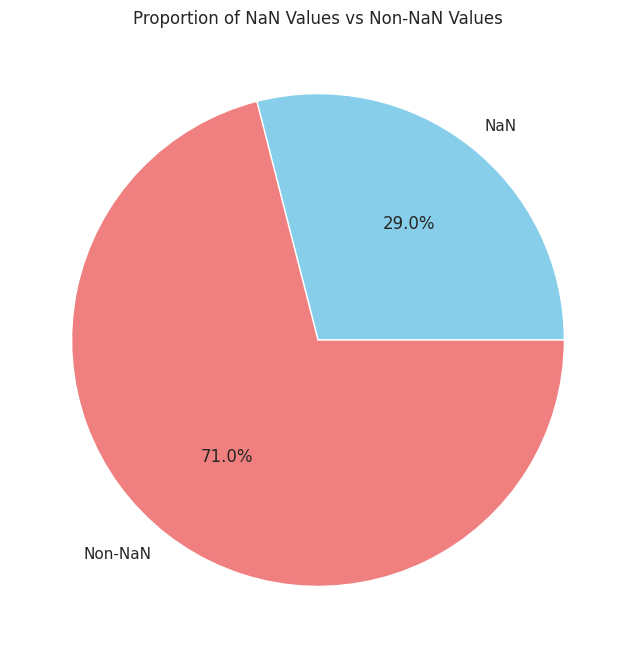

In [10]:
# Calcular la cantidad de NaN y no NaN por cada columna
nan_count = df.isna().sum()
non_nan_count = df.count(numeric_only=True)

# Calcular la proporción de NaN versus no NaN
nan_proportion = nan_count / (nan_count + non_nan_count)

# Configurar el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie([nan_proportion.sum()/12, 1 - nan_proportion.sum()/12], labels=['NaN', 'Non-NaN'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of NaN Values vs Non-NaN Values')

# Mostrar el gráfico
plt.show()

In [ ]:
# Calcula el porcentaje de valores no NaN en cada columna
non_nan_percentages = df.count() / len(df) * 100

# Crea el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
non_nan_percentages.plot(kind='barh', color='skyblue')
plt.xlabel('% de datos no NaN')
plt.ylabel('Columnas')
plt.title('Porcentaje de datos no NaN por columna')
plt.show()


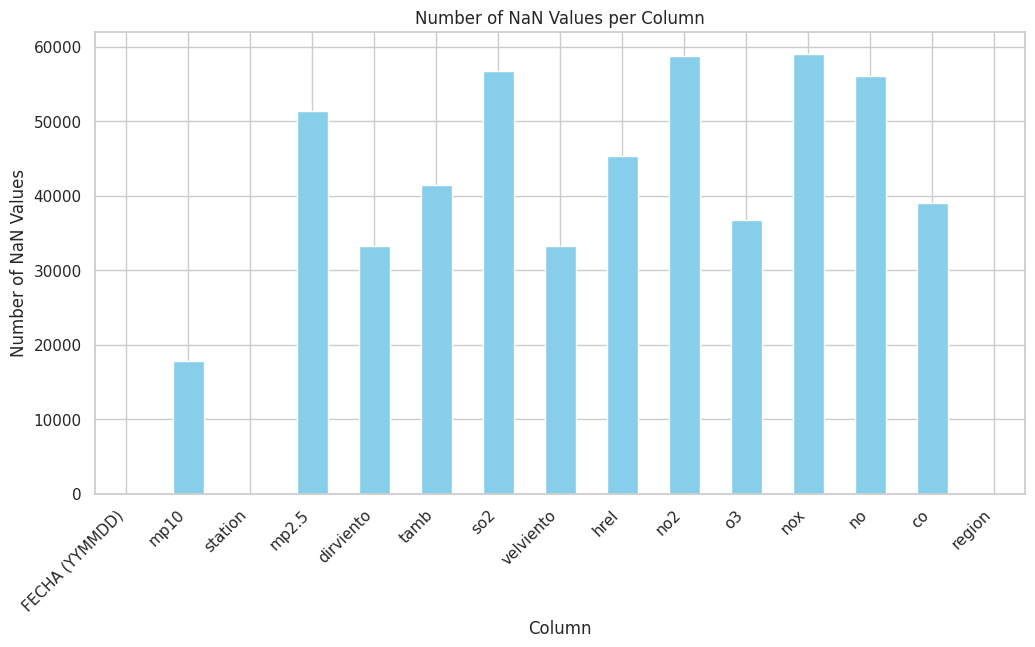

In [ ]:
# Calculate the count of NaN for each column
nan_count = df.isna().sum()

# Set seaborn style (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
nan_count.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [ ]:
# Crear nuevas columnas para año, mes y día
df['Year'] = (df['FECHA (YYMMDD)'].dt.year)
df['Month'] = (df['FECHA (YYMMDD)'].dt.month)
df['Day'] = (df['FECHA (YYMMDD)'].dt.day)

In [ ]:
df['station'].unique()

array(['independencia', 'parque ohiggins', 'las condes', 'cerrillos 1',
       'El bosque', 'pudahuel', 'la florida', 'supersite-escuela e10',
       'cerro navia', 'hospital del cobre', 'coronel sur', 'puente alto',
       'talagante', 'liceo polivalente', 'kingston college',
       'consultorio san vicente', 'nueva libertad', 'lota urbana',
       'lota rural', 'colicheu', 'club 23 de marz', 'estacion centro',
       'hualqui', 'club de empleados', 'lautaro', 'laja', 'coronel norte',
       'lagunillas enel', 'escuadron enel'], dtype=object)

In [ ]:
!pip install utm


In [ ]:
#utm coordinates by station
independencia=[346488,6300681,19]
parque_ohiggins=[345673,6296019,19]
las_condes=[358305,6305906,19]
cerrillos_1=[340277,6292747,19]
El_bosque=[345313,6286825,19]
pudahuel=[337311,6298809,19]
la_florida=[352504,6290304,19]
supersite_escuela_e10=[377404,7557193,19]
cerro_navia=[338984,6299360,19]
hospital_del_cobre=[509242,7516916,19]
coronel_sur=[665556 ,5899980,18]
puente_alto=[352049,6282013,19]
talagante=[318945,6272298,19]
liceo_polivalente=[682597,5947369,18]
kingston_college=[673817,5927247,18]
consultorio_san_vicente=[667557,5934138,18]
nueva_libertad=[667962,5932742,19]
lota_urbana=[664885,5895289,18]
lota_rural=[664203,5892415,18]
colicheu=[743195,5899021,18]
club_23_de_marz=[506399 ,7516241 ,19]
estacion_centro=[507389,7516053,19]
hualqui=[684073 ,5905626,18]
club_de_empleados=[705393,5846899,19]
lautaro=[707166,5846063,18]
laja=[702974,5872964,19]
coronel_norte=[664628,5902487,19]
lagunillas_enel=[664362,5905258,18]
escuadron_enel=[664643,5908666,18]
stations=[independencia,parque_ohiggins,las_condes,cerrillos_1,El_bosque,pudahuel,la_florida,supersite_escuela_e10,cerro_navia,hospital_del_cobre,coronel_sur,puente_alto,talagante,liceo_polivalente,kingston_college,consultorio_san_vicente,nueva_libertad,lota_urbana,lota_rural,colicheu,club_23_de_marz,estacion_centro,hualqui,club_de_empleados,lautaro,laja,coronel_norte,lagunillas_enel,escuadron_enel]

In [ ]:
import utm
def utm_to_latlon(easting, northing, zone_number):
    # Convert UTM to latitude and longitude
    lat, lon = utm.to_latlon(easting, northing, zone_number,northern=False)
    return lat, lon

places = ['independencia', 'parque_ohiggins', 'las_condes', 'cerrillos_1', 'El_bosque', 'pudahuel', 'la_florida', 'supersite_escuela_e10', 'cerro_navia', 'hospital_del_cobre', 'coronel_sur', 'puente_alto', 'talagante', 'liceo_polivalente', 'kingston_college', 'consultorio_san_vicente', 'nueva_libertad', 'lota_urbana', 'lota_rural', 'colicheu', 'club_23_de_marz', 'estacion_centro', 'hualqui', 'club_de_empleados', 'lautaro', 'laja', 'coronel_norte', 'lagunillas_enel', 'escuadron_enel']
station_dict={}
for station in stations:
  pointer=utm_to_latlon(station[0], station[1], station[2])
  station=[pointer[0],pointer[1]]
  station_dict[places.pop(0)]=station


In [ ]:
station_dict

{'independencia': [-33.42226118896334, -70.65113863331389],
 'parque_ohiggins': [-33.46417650404609, -70.66070229347744],
 'las_condes': [-33.376776047290946, -70.5232561485476],
 'cerrillos_1': [-33.492884232397124, -70.71932866072721],
 'El_bosque': [-33.54701601793992, -70.66616286081593],
 'pudahuel': [-33.43778535588638, -70.75014408801236],
 'la_florida': [-33.516666882320685, -70.58816010361122],
 'supersite_escuela_e10': [-22.08584570564769, -70.1883608994189],
 'cerro_navia': [-33.43307040157682, -70.73205509371141],
 'hospital_del_cobre': [-22.45401303052513, -68.91017511944003],
 'coronel_sur': [-37.03180018388554, -73.13863514642104],
 'puente_alto': [-33.591356239496974, -70.5944306781794],
 'talagante': [-33.67381931104121, -70.95299615854955],
 'liceo_polivalente': [-36.601716045579685, -72.95852150074575],
 'kingston_college': [-36.784649744533155, -73.05206181268939],
 'consultorio_san_vicente': [-36.72369016050932, -73.12369491449813],
 'nueva_libertad': [-36.73619651

In [ ]:
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00


In [ ]:
import ee
import geemap.core as geemap


In [ ]:
ee.Authenticate()
ee.Initialize(project="pm-predictions")


In [ ]:

dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
filtered = dataset.filterDate('2021-05-01', '2021-06-01')


# Applies scaling factors.
def apply_scale_factors(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  )


dataset = filtered.map(apply_scale_factors)
image = ee.Image(filtered.sort('system:time_start', False).first())
visualization = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
    'min': 0.0,
    'max': 0.3,
}

m = geemap.Map()
point = ee.Geometry.Point(-68.93, -22.46)

# Apply the coordinates method to the Point object.
point_coordinates = point.coordinates()
m.set_center(-68.93, -22.46, 8)
m.add_layer(dataset, visualization, 'True Color (432)')
m.add_layer(point, {'color': 'black'}, 'Geometry [black]: point')

m

NameError: name 'ee' is not defined

In [ ]:
# Define una geometría de 5 km x 5 km centrada en el punto de interés
) # 5000 metros = 5 km

# Recorta la imagen según la geometría definida
clipped_image = image.clip(square)
# Define los parámetros de exportación
export_params = {
    'image': clipped_image,
    'description': 'clipped_image',
    'folder': 'GEE_Images',
    'scale': 30,
    'region': square.getInfo()['coordinates']
}

# Exporta la imagen a Google Drive


In [ ]:
from keras.models import Model
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, Bidirectional, Input, concatenate,Reshape
from keras.utils import plot_model

# Definición del modelo CNN
input1 = Input(shape=(None, 100, 100, 8)) # Asume que tus imágenes son de 100x100 con 8 canales
cnn = TimeDistributed(Conv2D(64, kernel_size=3, activation='relu'))(input1)
cnn = TimeDistributed(MaxPooling2D(2))(cnn)
cnn = TimeDistributed(Conv2D(128, kernel_size=3, activation='relu'))(cnn)
cnn = TimeDistributed(MaxPooling2D(2))(cnn)
cnn = TimeDistributed(Conv2D(64, kernel_size=3, activation='relu'))(cnn)
cnn = TimeDistributed(MaxPooling2D(2))(cnn)
cnn = TimeDistributed(Flatten())(cnn)

# Definición del modelo LSTM
input2 = Input(shape=(None, 14)) # Asume que tienes 14 características tabuladas
dense = TimeDistributed(Dense(128, activation='relu'))(input2)
dense = TimeDistributed(Dropout(0.5))(dense)
dense = TimeDistributed(Dense(64, activation='relu'))(dense)
dense = TimeDistributed(Dropout(0.5))(dense)
dense = TimeDistributed(Dense(32, activation='relu'))(dense)

# Combinación de los modelos
merge = concatenate([cnn, dense])
lstm = Bidirectional(LSTM(100, return_sequences=True))(merge)
lstm = Dropout(0.5)(lstm)
lstm = Bidirectional(LSTM(100, return_sequences=False))(lstm)
lstm = Dropout(0.5)(lstm)

# Capa de salida
output = Dense(1, activation='linear')(lstm) # Asume que estás haciendo una regresión

# Creación del modelo
model = Model([input1, input2], output)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])



In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)